In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
577,2,118,80,0,0,42.9,0.693,21,1
567,6,92,62,32,126,32.0,0.085,46,0
369,1,133,102,28,140,32.8,0.234,45,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
X = df.drop(columns=['Outcome'])
y = df.Outcome

In [7]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [8]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=156,stratify=y)
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

In [10]:
def get_clf_eval(y_test, pred,pred_proba_1):
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
    
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test,pred)
    auc = roc_auc_score(y_test,pred_proba_1)
    print("==오차행렬==")
    print(confusion, '\n')
    print("==Score==")
    print(f'정확도 : {accuracy:.4f}, 정밀도 : {precision:.4f}, 재현율 : {recall:.4f}, F1:{f1:.4f}, AUC:{auc:.4f}')
    
def precision_recall_curve_plot(y_test,pred_proba_1):
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_1)
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]    
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='--',label='precision')
    plt.plot(thresholds,recalls[0:threshold_boundary],label='recall')
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlabel('임계값')
    plt.ylabel('정밀도와 재현율')
    plt.legend()
    plt.grid()
    plt.show()

In [11]:
get_clf_eval(y_test, pred,pred_proba)

==오차행렬==
[[87 13]
 [22 32]] 

==Score==
정확도 : 0.7727, 정밀도 : 0.7111, 재현율 : 0.5926, F1:0.6465, AUC:0.8083


C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


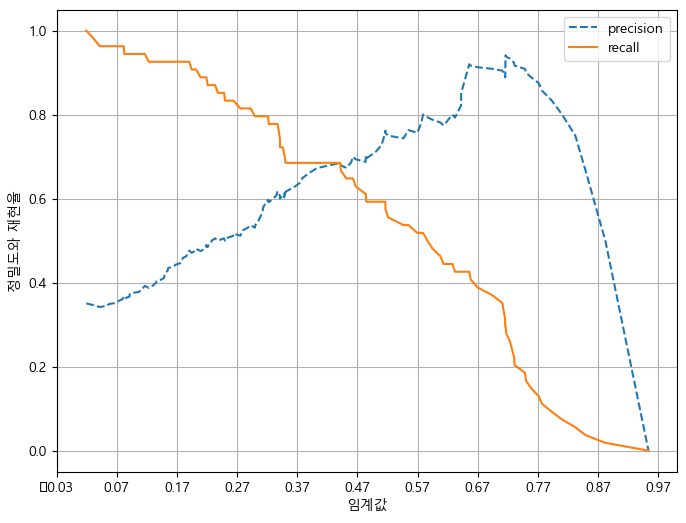

In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='Malgun Gothic')
precision_recall_curve_plot(y_test,pred_proba)

In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([ 5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  3.,  0.,  1.,  1.,  1.,  1.,  3.,  4.,  4.,  6.,  4.,
         7., 12.,  9., 17., 10., 15., 20., 16., 20., 17., 20., 26., 22.,
        19., 25., 25., 20., 18., 21., 18., 17., 17., 21., 25., 14., 25.,
        12., 10., 10., 16., 13., 10., 11., 12., 16.,  5.,  9.,  6., 11.,
         5., 10.,  4.,  9.,  7.,  6.,  5.,  5.,  7.,  4.,  3.,  6., 10.,
         4.,  3.,  5.,  6.,  2.,  2.,  5.,  7.,  2.]),
 array([  0.  ,   1.99,   3.98,   5.97,   7.96,   9.95,  11.94,  13.93,
         15.92,  17.91,  19.9 ,  21.89,  23.88,  25.87,  27.86,  29.85,
         31.84,  33.83,  35.82,  37.81,  39.8 ,  41.79,  43.78,  45.77,
         47.76,  49.75,  51.74,  53.73,  55.72,  57.71,  59.7 ,  61.69,
         63.68,  65.67,  67.66,  69.65,  71.64,  73.63,  75.62,  77.61,
         79.6 ,  81.59,  83.58,  85.57,  87.56,  89.55,  91.54,  93.53,
  

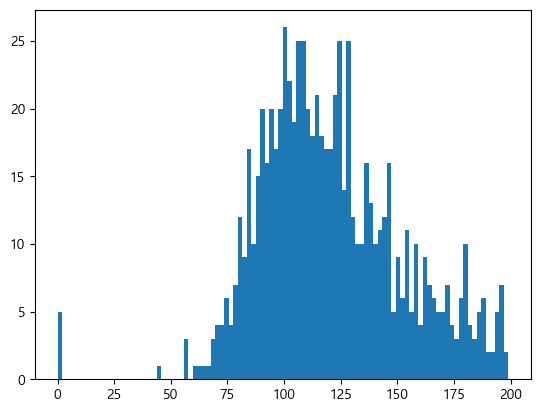

In [14]:
plt.hist(df.Glucose,bins=100)

In [16]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
total_count = df['Glucose'].count()
for feature in zero_features:
    zero_count = df[df[feature]==0][feature].count()
    print(f'{feature}컬럼의 0의 건수는 {zero_count}건, 퍼센트는 {100*zero_count/total_count}%')
    

Glucose컬럼의 0의 건수는 5건, 퍼센트는 0.6510416666666666%
BloodPressure컬럼의 0의 건수는 35건, 퍼센트는 4.557291666666667%
SkinThickness컬럼의 0의 건수는 227건, 퍼센트는 29.557291666666668%
Insulin컬럼의 0의 건수는 374건, 퍼센트는 48.697916666666664%
BMI컬럼의 0의 건수는 11건, 퍼센트는 1.4322916666666667%


In [26]:
mean_zero_features = df[zero_features].mean()

In [27]:
df[zero_features] = df[zero_features].replace(0,mean_zero_features)

In [28]:
for feature in zero_features:
    zero_count = df[df[feature]==0][feature].count()
    print(f'{feature}컬럼의 0의 건수는 {zero_count}건, 퍼센트는 {100*zero_count/total_count}%')

Glucose컬럼의 0의 건수는 0건, 퍼센트는 0.0%
BloodPressure컬럼의 0의 건수는 0건, 퍼센트는 0.0%
SkinThickness컬럼의 0의 건수는 0건, 퍼센트는 0.0%
Insulin컬럼의 0의 건수는 0건, 퍼센트는 0.0%
BMI컬럼의 0의 건수는 0건, 퍼센트는 0.0%


In [31]:
x = df.drop(columns=['Outcome'])
y = df.Outcome
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=156, stratify = y)

In [33]:
get_clf_eval(y_test, pred,pred_proba)

==오차행렬==
[[87 13]
 [22 32]] 

==Score==
정확도 : 0.7727, 정밀도 : 0.7111, 재현율 : 0.5926, F1:0.6465, AUC:0.8083


In [43]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.5]

# 스레숄드에 따른 스코어들 보는 함수
def get_eval_by_threshold (y_test, pred, pred_proba_1, thresholds):
    from sklearn.preprocessing import Binarizer
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold)
        custom_predict = binarizer.fit_transform(pred_proba_1)
        print(f'임계값 : {custom_threshold}')
        get_clf_eval(y_test, custom_predict, pred_proba_1)

get_eval_by_threshold(y_test, pred, pred_proba.reshape(-1,1), thresholds)

임계값 : 0.3
==오차행렬==
[[63 37]
 [11 43]] 

==Score==
정확도 : 0.6883, 정밀도 : 0.5375, 재현율 : 0.7963, F1:0.6418, AUC:0.8083
임계값 : 0.33
==오차행렬==
[[72 28]
 [12 42]] 

==Score==
정확도 : 0.7403, 정밀도 : 0.6000, 재현율 : 0.7778, F1:0.6774, AUC:0.8083
임계값 : 0.36
==오차행렬==
[[78 22]
 [17 37]] 

==Score==
정확도 : 0.7468, 정밀도 : 0.6271, 재현율 : 0.6852, F1:0.6549, AUC:0.8083
임계값 : 0.39
==오차행렬==
[[82 18]
 [17 37]] 

==Score==
정확도 : 0.7727, 정밀도 : 0.6727, 재현율 : 0.6852, F1:0.6789, AUC:0.8083
임계값 : 0.42
==오차행렬==
[[83 17]
 [17 37]] 

==Score==
정확도 : 0.7792, 정밀도 : 0.6852, 재현율 : 0.6852, F1:0.6852, AUC:0.8083
임계값 : 0.45
==오차행렬==
[[83 17]
 [19 35]] 

==Score==
정확도 : 0.7662, 정밀도 : 0.6731, 재현율 : 0.6481, F1:0.6604, AUC:0.8083
임계값 : 0.48
==오차행렬==
[[85 15]
 [21 33]] 

==Score==
정확도 : 0.7662, 정밀도 : 0.6875, 재현율 : 0.6111, F1:0.6471, AUC:0.8083
임계값 : 0.5
==오차행렬==
[[87 13]
 [22 32]] 

==Score==
정확도 : 0.7727, 정밀도 : 0.7111, 재현율 : 0.5926, F1:0.6465, AUC:0.8083
